In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
!pip install datasets

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.5 MB/s eta 0:00:00


In [ ]:
from datasets import load_dataset

cnn_news_summary_ds = load_dataset("yachay/text_coordinates_seasons")

cnn_news_summary_ds

README.md:   0%|          | 0.00/4.89k [00:00<?, ?B/s]

seasons.json:   0%|          | 0.00/163M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/624036 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['created_at', 'text', 'geo_geo_bbox'],
        num_rows: 624036
    })
})

In [ ]:
import pandas as pd

df = pd.DataFrame(cnn_news_summary_ds['train'])
df.head()

,created_at,text,geo_geo_bbox
0,{'$numberLong': '1633047052000'},@city4people_smr @my_cla4ik_f0rmy Пока держитс...,"[49.7453894, 53.0917983, 50.3903269, 53.5511467]"
1,{'$numberLong': '1633046525000'},@depsamobr63 @RyabovaYN @samminobr https://t.c...,"[49.7453894, 53.0917983, 50.3903269, 53.5511467]"
2,{'$numberLong': '1633046828000'},"Да здравствуют пробки и изношенный транспорт, ...","[49.7453894, 53.0917983, 50.3903269, 53.5511467]"
3,{'$numberLong': '1633049968000'},@tamasinabeansun кто все?,"[92.6264708, 55.9122769, 93.1669708, 56.1333566]"
4,{'$numberLong': '1633048009000'},"@yanaangelpochty @kalinamalina_km Нет. Подуху,...","[92.6264708, 55.9122769, 93.1669708, 56.1333566]"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624036 entries, 0 to 624035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   created_at    624036 non-null  object
 1   text          624036 non-null  object
 2   geo_geo_bbox  613944 non-null  object
dtypes: object(3)
memory usage: 14.3+ MB


In [ ]:
# Check the count of missing values
print(df.isnull().sum())

# Optionally drop rows with missing values in 'geo_geo_bbox'
df_cleaned = df.dropna(subset=['geo_geo_bbox'])


created_at          0
text                0
geo_geo_bbox    10092
dtype: int64


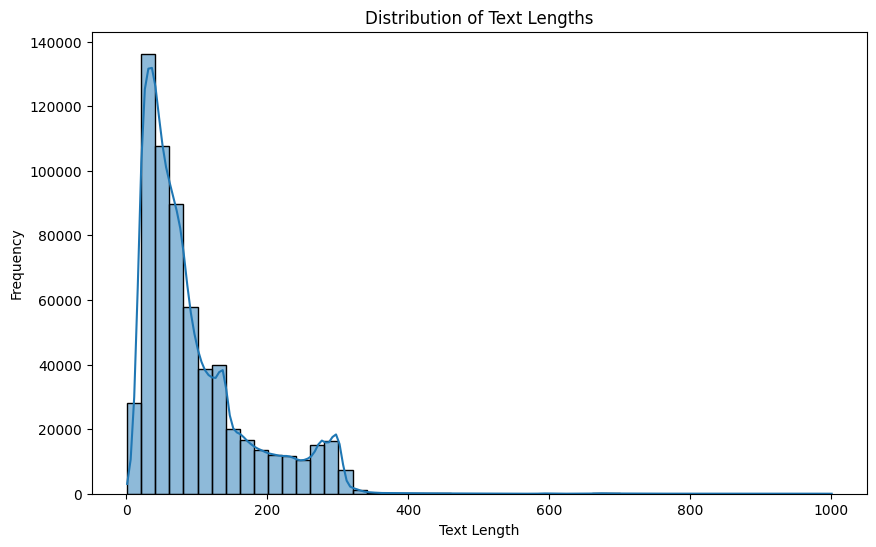

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns



# Calculate text length
df['text_length'] = df['text'].apply(len)

# Plot the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()
